In [1]:
# Bibliotecas para o estudo
import pandas as pd # estrutura de dados
import matplotlib.pyplot as plt # análise por gráficos
import seaborn as sns # análise por gráficos

In [2]:
path = '../datasets/srag/INFLUD22-03-04-2023.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['VACINA', 'CLASSI_FIN', 'NU_IDADE_N'] 
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557476 entries, 0 to 557475
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NU_IDADE_N  557476 non-null  int64  
 1   VACINA      331101 non-null  float64
 2   CLASSI_FIN  524837 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.8 MB


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = df.dropna()

In [5]:
df = df[df["VACINA"] != 9]

In [6]:
df['VACINA'] = df['VACINA'].map({1:"Sim", 2: "Não"})
df['CLASSI_FIN'] = df['CLASSI_FIN'].map({
    1: "SRAG por influenza",
    2: "SRAG por outro vírus respiratório",
    3: "SRAG por outro agente etiológico",
    4: "SRAG não especificado",
    5: "SRAG por COVID-19"
})

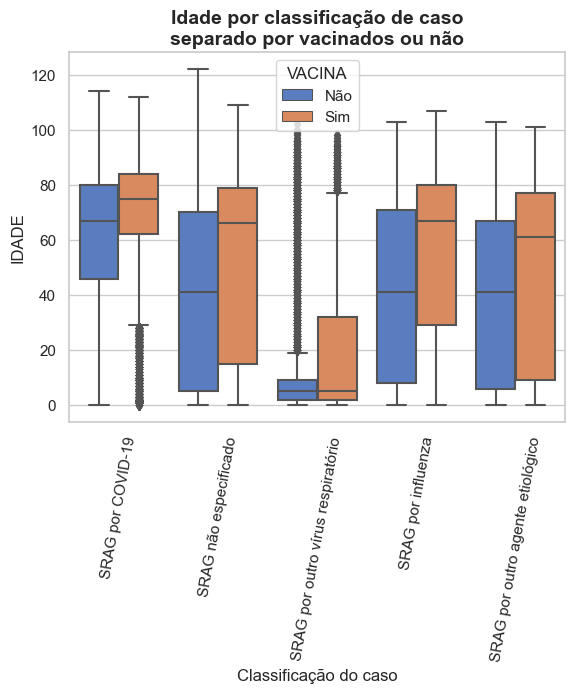

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

sns.boxplot(x="CLASSI_FIN", y="NU_IDADE_N", hue="VACINA", data=df)

plt.ylabel("IDADE")
plt.xlabel("Classificação do caso")
plt.title("Idade por classificação de caso\nseparado por vacinados ou não", fontweight="bold", fontsize=14)
plt.xticks(rotation=80)
plt.show()

In [90]:
import re

def get_iso_from(date):
    return re.sub(r'(\d+)/(\d+)/(\d+)', r"\3-\2-\1", date)


path = '../datasets/srag/INFLUD23-03-04-2023.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['VACINA', 'NU_IDADE_N', "HOSPITAL", "DT_SAIDUTI", "DT_ENTUTI", "UTI", "CLASSI_FIN", "CS_SEXO"] 
)
df.info()


# Filtro (apenas internados)
df = df[df["HOSPITAL"]==1] # 356349 rows

# filtrar por data de saída da UTI não nula
df = df[df["DT_SAIDUTI"].notnull()]

# filtrar por data de entrada da UTI não nula
df = df[df["DT_ENTUTI"].notnull()]

# formatar data de entrada
df["DT_ENTUTI"] = df["DT_ENTUTI"].map(get_iso_from)

# formatar dta de saída
df["DT_SAIDUTI"] = df["DT_SAIDUTI"].map(get_iso_from)

# transformar para datetime object
df["DT_SAIDUTI"] = pd.to_datetime(df["DT_SAIDUTI"], infer_datetime_format=True)
df["DT_ENTUTI"] = pd.to_datetime(df["DT_ENTUTI"], infer_datetime_format=True)

# criar nova coluna de dias na UTI
# essa coluna será o objetivo
df["DAYS_ON_UTI"] = df["DT_SAIDUTI"] - df["DT_ENTUTI"]
df["DAYS_ON_UTI"] = df["DAYS_ON_UTI"].map(lambda date: date.days)

# remover colunas "HOSPITAL", "DT_ENTUTI", "DT_SAIDUTI", "UTI"
df.drop(["HOSPITAL", "DT_ENTUTI", "DT_SAIDUTI"], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61489 entries, 0 to 61488
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CS_SEXO     61489 non-null  object 
 1   NU_IDADE_N  61489 non-null  int64  
 2   VACINA      32404 non-null  float64
 3   HOSPITAL    59459 non-null  float64
 4   UTI         53218 non-null  float64
 5   DT_ENTUTI   16045 non-null  object 
 6   DT_SAIDUTI  7140 non-null   object 
 7   CLASSI_FIN  50331 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.8+ MB


In [91]:
df = df[df["VACINA"]!=9]
df = df[df["DAYS_ON_UTI"]<60]

In [92]:
df = df.dropna()

In [93]:
df['VACINA'] = df['VACINA'].map({1:"Sim", 2: "Não"})
df['CLASSI_FIN'] = df['CLASSI_FIN'].map({
    1: "SRAG por influenza",
    2: "SRAG por outro vírus respiratório",
    3: "SRAG por outro agente etiológico",
    4: "SRAG não especificado",
    5: "SRAG por COVID-19"
})

<Figure size 400x2000 with 0 Axes>

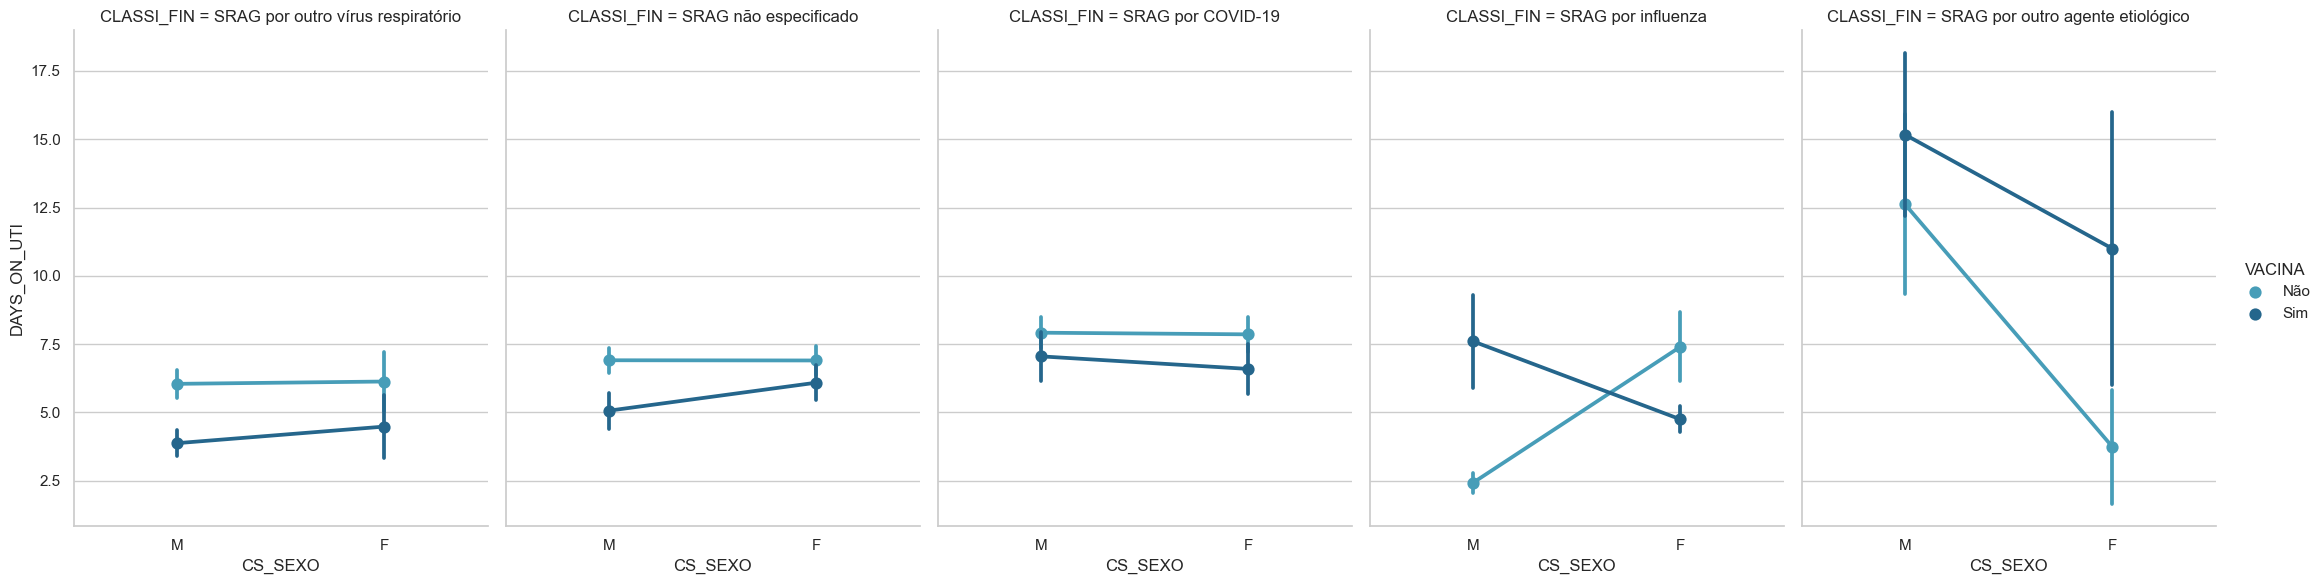

In [94]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
plt.figure(figsize=(4,20))
sns.catplot(
    data=df, x="CS_SEXO", y="DAYS_ON_UTI", hue="VACINA", col="CLASSI_FIN", palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75)
# plt.xticks(list(range(1,100,5)))
plt.show()